In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Heating

In [19]:
df = pd.read_csv("DC.csv")
df

,Capacitance,Capacitance 2,Temperature
0,405,403,40
1,407,405,45
2,409,406,50
3,410,408,55
4,414,411,60
5,416,414,65
6,420,417,70
7,423,421,75
8,428,426,80
9,434,430,85


In [20]:
df["Dielectric1"] = df["Capacitance"]/0.349
df["Dielectric2"] = df["Capacitance 2"]/0.349

In [21]:
plt.rcdefaults()

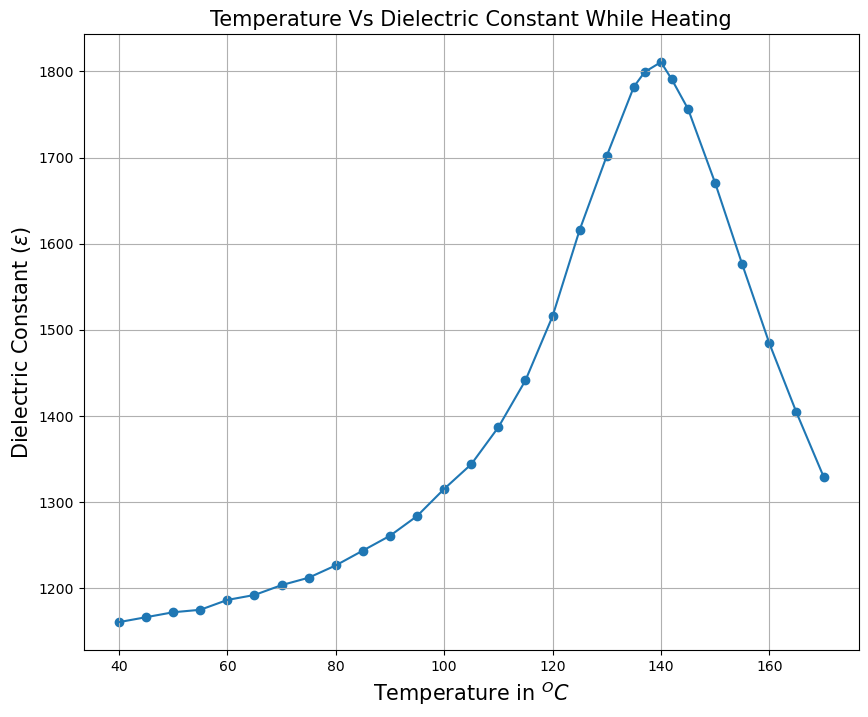

In [22]:
plt.figure(figsize = (10, 8))
plt.plot(df["Temperature"], df["Dielectric1"])
plt.scatter(df["Temperature"], df["Dielectric1"])
plt.xlabel("Temperature in $^O C$", fontsize=15)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=15)
plt.title("Temperature Vs Dielectric Constant While Heating", fontsize=15)
plt.grid()
# plt.savefig("DC1.pdf")


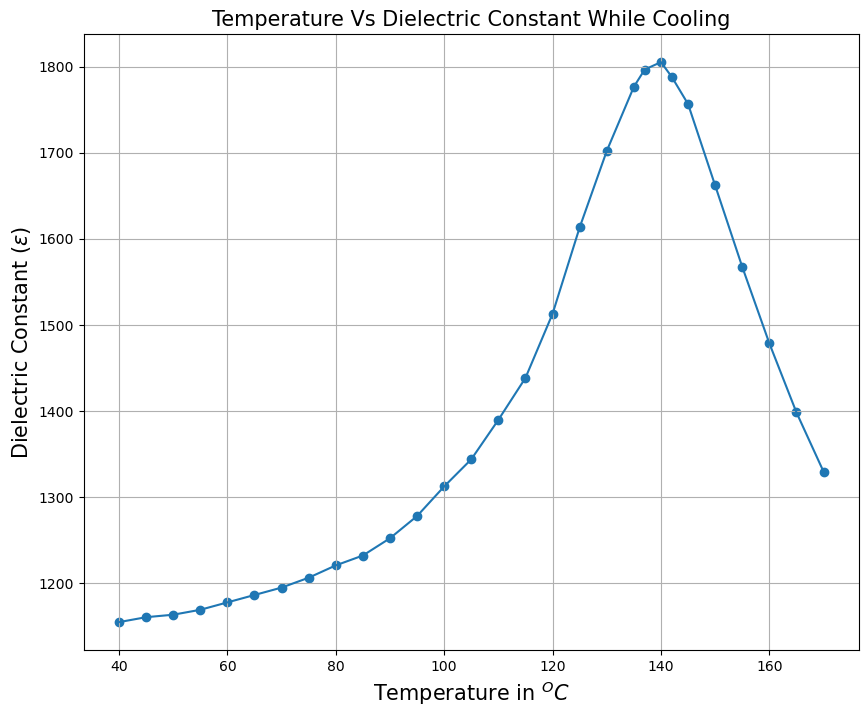

In [23]:
plt.figure(figsize = (10, 8))
plt.plot(df["Temperature"], df["Dielectric2"])
plt.scatter(df["Temperature"], df["Dielectric2"])
plt.xlabel("Temperature in $^O C$", fontsize=15)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=15)
plt.title("Temperature Vs Dielectric Constant While Cooling", fontsize=15)
plt.grid()
plt.savefig("DC2.pdf")


In [67]:
heating = df[["Temperature", "Capacitance", "Dielectric1"]]
heating["Dielectric1"] = heating["Dielectric1"].apply(lambda x:round(x, 2))
heating.columns = ["Temperature in Degrees Celcius", "Capacitance in pF", "Dielectric Constant"]
heating.head()

C:\Users\harik\AppData\Local\Temp\ipykernel_26608\2749227749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heating["Dielectric1"] = heating["Dielectric1"].apply(lambda x:round(x, 2))


,Temperature in Degrees Celcius,Capacitance in pF,Dielectric Constant
0,40,405,1160.46
1,45,407,1166.19
2,50,409,1171.92
3,55,410,1174.79
4,60,414,1186.25


In [68]:
heating.to_html("heating.html")

In [74]:
df

,Capacitance,Capacitance 2,Temperature,Dielectric1,Dielectric2
0,405,403,40,1160.458453,1154.727794
1,407,405,45,1166.189112,1160.458453
2,409,406,50,1171.919771,1163.323782
3,410,408,55,1174.785100,1169.054441
4,414,411,60,1186.246418,1177.650430
5,416,414,65,1191.977077,1186.246418
6,420,417,70,1203.438395,1194.842407
7,423,421,75,1212.034384,1206.303725
8,428,426,80,1226.361032,1220.630372
9,434,430,85,1243.553009,1232.091691


In [77]:
cooling = df[["Temperature", "Capacitance 2", "Dielectric2"]]
cooling["Dielectric2"] = cooling["Dielectric2"].apply(lambda x:round(x, 2))
cooling.columns = ["Temperature in Degrees Celcius", "Capacitance in pF", "Dielectric Constant"]
cooling.to_html("cooling.html")

C:\Users\harik\AppData\Local\Temp\ipykernel_26608\2894241573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cooling["Dielectric2"] = cooling["Dielectric2"].apply(lambda x:round(x, 2))


## Interpolating

In [24]:
import scipy.interpolate as interp

In [78]:
inter1 = interp.interp1d(df["Temperature"], df["Dielectric1"], kind="cubic")

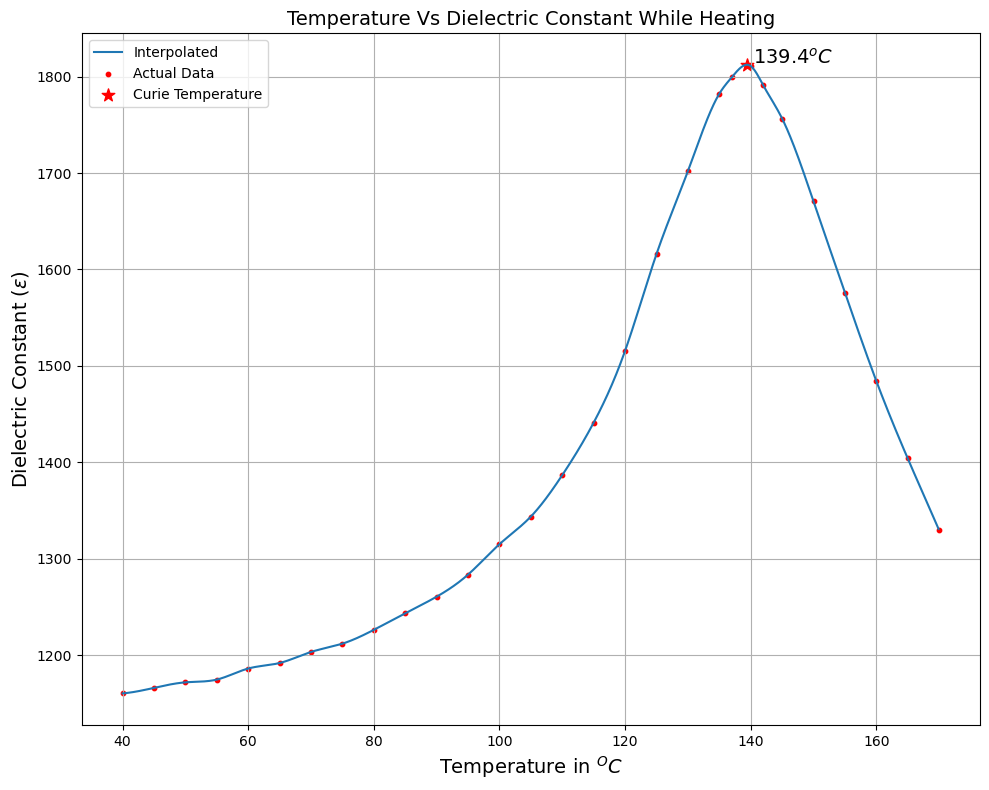

In [79]:
temps = np.arange(df["Temperature"].min(), df["Temperature"].max(), 0.1)
d1s = inter1(temps)
curie_t = round(temps[np.argmax(d1s)],1)
plt.figure(figsize = (10, 8))
plt.plot(temps, d1s, label="Interpolated")
plt.scatter(df["Temperature"], df["Dielectric1"], color="red", label="Actual Data", s=10)
plt.xlabel("Temperature in $^O C$", fontsize=14)
plt.scatter(curie_t, d1s[np.argmax(d1s)], label="Curie Temperature", color="red", marker="*", s=90)
plt.annotate(f"{curie_t}$^oC$", xy=(curie_t, d1s[np.argmax(d1s)]), xytext=(curie_t+1, d1s[np.argmax(d1s)]+1),
                fontsize=14)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=14)
plt.title("Temperature Vs Dielectric Constant While Heating", fontsize=14)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("DC1I.jpg")


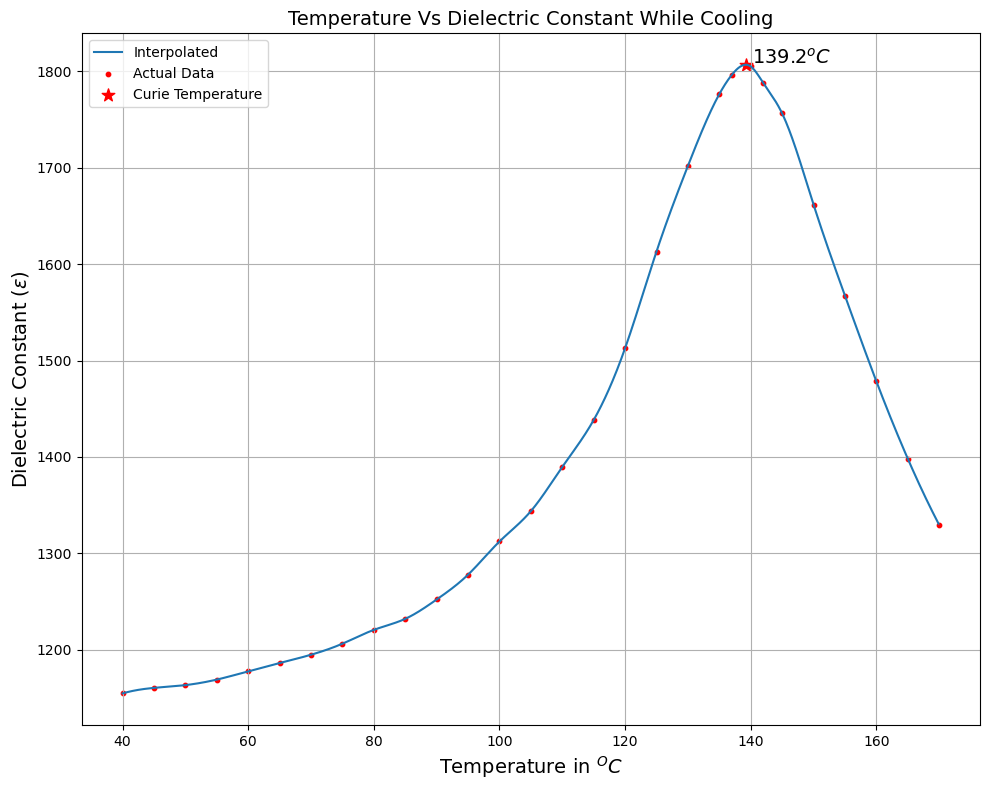

In [71]:
inter2 = interp.interp1d(df["Temperature"], df["Dielectric2"], kind="cubic")
temps = np.arange(df["Temperature"].min(), df["Temperature"].max(), 0.1)
d2s = inter2(temps)
curie_t = round(temps[np.argmax(d2s)],1)
plt.figure(figsize = (10, 8))
plt.plot(temps, d2s, label="Interpolated")
plt.scatter(df["Temperature"], df["Dielectric2"], color="red", label="Actual Data", s=10)
plt.xlabel("Temperature in $^O C$", fontsize=14)
plt.scatter(curie_t, d2s[np.argmax(d2s)], label="Curie Temperature", color="red", marker="*", s=90)
plt.annotate(f"{curie_t}$^oC$", xy=(curie_t, d2s[np.argmax(d2s)]), xytext=(curie_t+1, d2s[np.argmax(d2s)]+1),
                fontsize=14)
plt.ylabel("Dielectric Constant $(\epsilon)$", fontsize=14)
plt.title("Temperature Vs Dielectric Constant While Cooling", fontsize=14)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("DC2I.jpg")